# Multiple variable Linear Regression

Importing Data set

In [93]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import sklearn.metrics as sm
from sklearn import metrics
import math
from sklearn.metrics import accuracy_score
try:
    df = pd.read_csv('weatherHistory.csv')
except FileNotFoundError:
    print("File not found")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


# Data Preprocessing

Handling Missing Data

In [94]:
# Checking for null values in dataset
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Feature Scaling

In [95]:
# Feature scaling using Standardization
list = ['Humidity','Temperature (C)','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
for col in list:
   df[col] = (df[col] - df[col].mean())/df[col].std()
#print("Data set")
#print(df)

Separating independent and dependent variables

In [96]:
x = df[['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']]
y = df['Apparent Temperature (C)']

Splitting Dataset for train and test

In [97]:
s_f = 0.8
n = math.floor(s_f * df.shape[0])
l = len(x)
x_train = x.head(n)
y_train = y.head(n)
x_test = x.head(l-n)
y_test = y.head(l-n)

print("x_train")
print(x_train)
print("\ny_train")
print(y_train)
print("\nx_test")
print(x_test)
print("\ny_test")
print(y_test)
x_train.shape

x_train
       Temperature (C)  Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
0            -0.257598  0.793466           0.478633                0.591253   
1            -0.269812  0.639992           0.499591                0.665752   
2            -0.267486  0.793466          -0.995468                0.153569   
3            -0.381487  0.486518           0.476304                0.758877   
4            -0.332629  0.486518           0.033841                0.665752   
...                ...       ...                ...                     ...   
77157        -1.067240  0.998098          -0.723004               -1.736853   
77158        -1.079454  0.998098          -0.632183               -1.466793   
77159        -1.127730  0.946940          -1.100262                1.410746   
77160        -1.260926  0.998098          -1.121221               -1.680978   
77161        -1.348172  0.998098          -1.097933               -1.746165   

       Visibility (km)  Pressure (millibars

(77162, 6)

# Building model using train data

Converting train and test dataset into numpy array

In [98]:
x_train = np.array(x_train)
print(x_train.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

(77162, 6)


Add one column in x train and x test array for x0 which is equal to one

In [99]:
x0_train = np.ones((len(x_train),1))
X0_test = np.ones((len(x_test),1))
print(x0_train.shape)

new_x_train = np.c_[x0_train,x_train]
new_x_test = np.c_[X0_test,x_test]


(77162, 1)


Function for Calculating Hypothesis value of x train data 

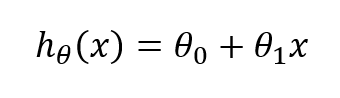

In [100]:
Image("Univariate linear equation.PNG", width = 200, height = 50)

In [101]:
def hypothesis(x,theta):
    hypothesis_of_theta = np.dot(x,theta)
    return hypothesis_of_theta

Function for Calculating cost function of linear regression with one variable

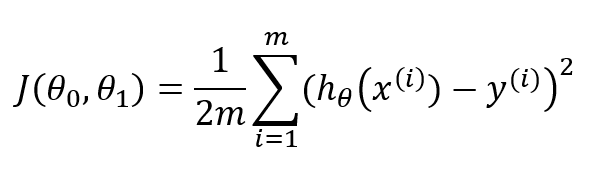

In [102]:
Image("CostFunction.PNG", width = 350, height = 100)

In [103]:
def cost_function(x,y,theta):
    m = len(x)
    hypothesis_of_theta = hypothesis(x,theta)
    temp = (hypothesis_of_theta - y) ** 2
    j_of_theta = temp.sum()/(2*m)
    return j_of_theta

Function for Minimizing cost function using Gradient Decent

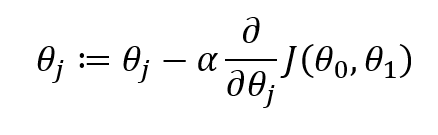

In [104]:
Image("Gradient Decent.PNG", width = 350, height = 100)

In [105]:
def gradient_descent(x,y,theta,alpha,steps):
    m = len(x)
    cost_function_values = []
    theta0 =[]
    theta1 = []
    for i in range(steps):
        hypothesis_of_theta = hypothesis(x,theta)
        #print(hypothesis_of_theta)
        temp = np.dot(x.T,(hypothesis_of_theta - y))
        #print(temp)
        derivatives = temp*(alpha/m)
        theta = theta - derivatives
        #print(f"Step {i+1} : theta 0 : {theta[0]} theta 1 : {theta[1]}")
        theta0.append(theta[0])
        theta1.append(theta[1])
        cost_function_values.append(cost_function(x,y,theta))
    return theta,cost_function_values ,theta0,theta1


Training data by calling function

In [106]:
theta = np.zeros((7,1))
steps = 8000
alpha = 0.001
print(f"Initial : theta 0 : {theta[0]} theta 1 : {theta[1]}")

#calling gradient decent function for minimizing theta 0 and theta 1 by passing x train data, y train data , 
#theta array which contains theta 0 and theta 1 as 0 , alpha and steps for gradient decent 
minimize_j_of_theta,cost_function_values,theta0,theta1 = gradient_descent(new_x_train,y_train,theta,alpha,steps)
print(f"Final Theta 0 : {minimize_j_of_theta[0]} Theta 1 : {minimize_j_of_theta[1]}")
print(f"Final Theta {minimize_j_of_theta}")
#print(f"\n\nCost function after every iteration : {cost_function_values}")
theta_values = np.c_[theta0,theta1]

Initial : theta 0 : [0.] theta 1 : [0.]
Final Theta 0 : [10.8402225] Theta 1 : [10.37794575]
Final Theta [[ 1.08402225e+01]
 [ 1.03779457e+01]
 [-1.65139595e-01]
 [-8.17143543e-01]
 [ 9.11412107e-02]
 [ 5.02499867e-02]
 [ 2.97582476e-03]]


# Testing

Calling function of hypothesis for x test data to find y predicted value

In [107]:
y_predicted = hypothesis(new_x_test,minimize_j_of_theta)
#print(y_predicted)

Finding the accuracy of our model by comparing real y test with y value predicted by model

In [108]:

print(f"Accuracy of model : {metrics.r2_score(y_test,y_predicted)}")          

Accuracy of model : 0.9892435274567549


# Graph Representation

In [109]:
sns.set(rc={'figure.figsize':(10.7,7.27)})

c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


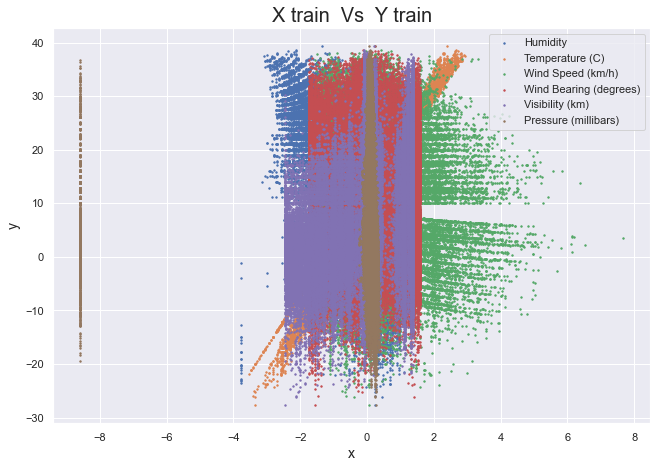

In [110]:
plt.xlabel("x",fontsize = 14)
plt.ylabel("y",fontsize = 14)
plt.title("X train  Vs  Y train" ,fontsize = 20)
for col in list:
    plt.scatter(df[col],df["Apparent Temperature (C)"],s=2 , label= col)
plt.legend()
plt.show()


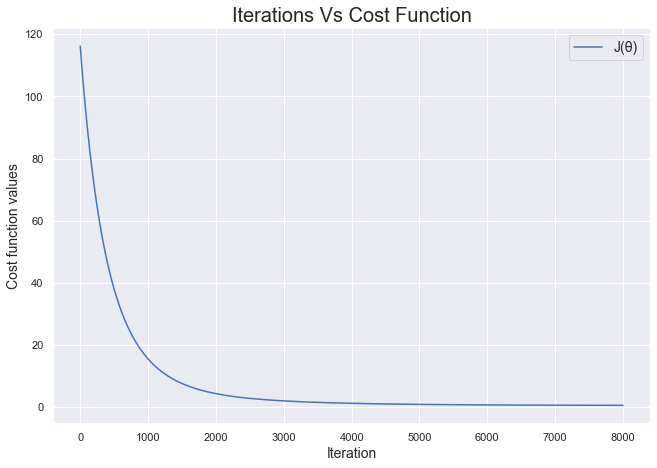

In [111]:
plt.plot(cost_function_values,label = "J(θ)")
plt.title("Iterations Vs Cost Function" ,fontsize = 20)
plt.xlabel("Iteration",fontsize = 14)
plt.ylabel("Cost function values",fontsize = 14)
plt.legend(fontsize = 14)

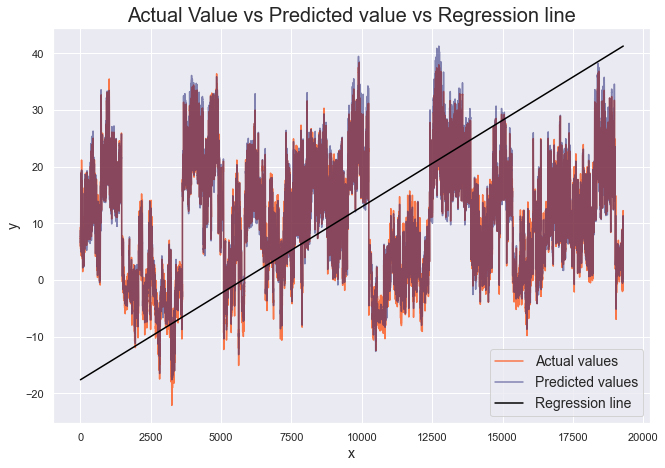

In [112]:
plt.plot(y_test,label="Actual values",color ='orangered',alpha = 0.7) 
plt.plot(y_predicted,label="Predicted values",color ='midnightblue',alpha = 0.5) 
plt.plot([0,len(y_predicted)], [min(y_predicted), max(y_predicted)], color='black',label = "Regression line")
plt.xlabel("x" ,fontsize = 14)
plt.ylabel("y",fontsize = 14)
plt.legend(fontsize = 14)
plt.title("Actual Value vs Predicted value vs Regression line",fontsize = 20)
plt.show()

# Building model using sci-kit learn

In [113]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
reg.score(x_train,y_train)
print(f"Accuracy of model : {round(metrics.r2_score(y_test,y_pred),2)}") 
print(f"Coefficient (theta 1) : {reg.coef_}")
print(f"Intercept (theta 0) : {reg.intercept_}")

Accuracy of model : 0.99
Coefficient (theta 1) : [[ 1.07456558e+01  2.02740939e-01 -6.91179859e-01  5.62601465e-02
   1.21786974e-03  1.74794580e-02]]
Intercept (theta 0) : [10.85755245]


c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
